In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch
%matplotlib inline

# Table of Contents

1. [Command Prompt MCK](#CommandPrompt_MCK)
2. [Process Comparisons](#Process_Comparisons)
    1. [Process Kappa](#Process_Kappa)
    2.[Process KappaLoc](#Process_KappaLoc)
    3. [Process KappaHisto](#Process_KappaHisto)
    4. [Process FractalDimension](#Process_FractalDimension)
    5. [Process_Simpsons Diversity Index](#Process_Simpsons)
    6. [Process_Clumpiness](#Process_Clumpiness)
3. [Clustering Metrics](#Clustering_Metrics)
4. [Dendrogram Clusters](#Dendrogram_Clustering)
5. [Graphing Clusters](#Graphing_Clusters)
1. [Find Medoid Maps](#Find_Medoids)
1. [To Do](#ToDo)

# CommandPrompt_MCK

<font size="5">Functional</font>

In [ ]:
# Cmd for kappa (also contains kappa loc and kappa histo)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappa.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for fractal dimension
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fractaldimension.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for Simpson's Diversity Index
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\simpsons.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

<font size="5">Not working for various reasons</font>

In [ ]:
# Cmd for kappa simulation (no base map in csl)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for fuzzy kappa simulation (no base map in csl)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\fuzzykappasimulation.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

In [ ]:
# Cmd for fuzzy kappa (only runs 1 of the comparisons and doesn't calculate the right value)
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\kappafuzzy_orig.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

<font size="5">Results not varied</font>

In [ ]:
# Cmd for clumpiness
os.system('cmd /c "C:\Thesis_Python\Map_Comparison_Kit\MCK.exe /RunComparisonSet C:\LUMOS\MCK\clumpiness.csl \
            C:\LUMOS\MCK\log.log C:\LUMOS\MCK\Output"')

<font size="6">Create DataFrames</font>

In [2]:
def df_gen(dims=100):
    rows, cols = rowscols(dims)
    df = pd.DataFrame(index=rows, columns = cols)
    np.fill_diagonal(df.values, 1)
    return df

def rowscols(nrmaps):
    df_init = []
    for i in range(nrmaps):
        df_init.append('Map' + ' ' + str(i))
    return df_init, df_init

In [3]:
df_clumpi = df_gen(5)
df_fractal = df_gen(5)
df_simpsons = df_gen(5)
df_5 = df_gen(5)
df_100 = df_gen(100)

# Process_Comparisons

# Process_Kappa

In [4]:
df_kappa = df_gen(100)

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'Map' + ' ' + str(i)
            map_two = 'Map' + ' ' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' kappa="')
                        loc_start = loc + len(' kappa="')
                        loc_end =  line.find('"', loc_start)
                        df_kappa.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_kappa.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [5]:
df_kappa = df_kappa.astype(float).round(decimals=3)
kappa_dist = 1 - df_kappa
kappa_dist[kappa_dist < 0] = 0
kappa_dist.head(10)

,Map 0,Map 1,Map 2,Map 3,Map 4,Map 5,Map 6,Map 7,Map 8,Map 9,...,Map 90,Map 91,Map 92,Map 93,Map 94,Map 95,Map 96,Map 97,Map 98,Map 99
Map 0,0.000,0.062,0.082,0.054,0.047,0.054,0.088,0.087,0.091,0.064,...,0.065,0.081,0.086,0.068,0.081,0.078,0.079,0.086,0.075,0.083
Map 1,0.062,0.000,0.037,0.017,0.061,0.017,0.043,0.045,0.049,0.065,...,0.076,0.034,0.040,0.048,0.041,0.053,0.034,0.045,0.032,0.038
Map 2,0.082,0.037,0.000,0.036,0.069,0.036,0.042,0.042,0.045,0.073,...,0.077,0.031,0.044,0.049,0.028,0.058,0.044,0.047,0.038,0.047
Map 3,0.054,0.017,0.036,0.000,0.062,0.000,0.042,0.040,0.049,0.074,...,0.081,0.042,0.044,0.045,0.042,0.057,0.032,0.044,0.031,0.038
Map 4,0.047,0.061,0.069,0.062,0.000,0.062,0.068,0.075,0.077,0.055,...,0.044,0.059,0.063,0.053,0.060,0.051,0.050,0.075,0.041,0.052
Map 5,0.054,0.017,0.036,0.000,0.062,0.000,0.042,0.040,0.049,0.074,...,0.081,0.042,0.044,0.045,0.042,0.057,0.032,0.044,0.031,0.038
Map 6,0.088,0.043,0.042,0.042,0.068,0.042,0.000,0.036,0.017,0.077,...,0.070,0.038,0.025,0.051,0.034,0.055,0.027,0.040,0.032,0.027
Map 7,0.087,0.045,0.042,0.040,0.075,0.040,0.036,0.000,0.043,0.080,...,0.094,0.050,0.050,0.033,0.046,0.062,0.035,0.019,0.040,0.035
Map 8,0.091,0.049,0.045,0.049,0.077,0.049,0.017,0.043,0.000,0.081,...,0.070,0.041,0.027,0.057,0.035,0.060,0.035,0.042,0.041,0.035
Map 9,0.064,0.065,0.073,0.074,0.055,0.074,0.077,0.080,0.081,0.000,...,0.055,0.065,0.066,0.061,0.074,0.045,0.077,0.079,0.071,0.080


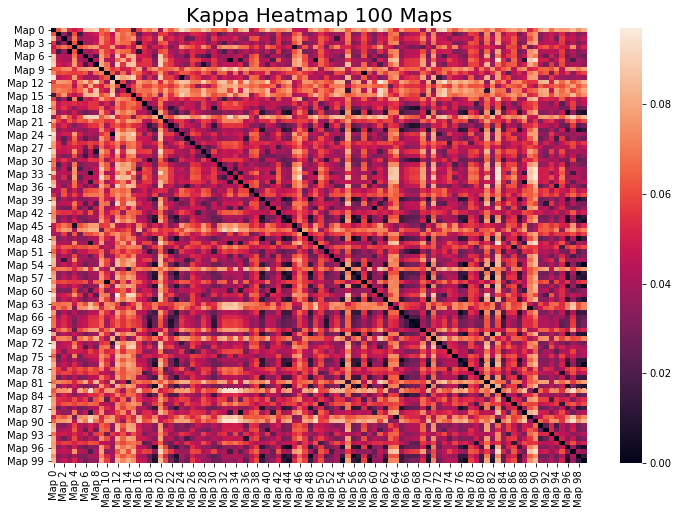

In [6]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(kappa_dist)
_ = plt.title("Kappa Heatmap 100 Maps", fontsize =20)

# Process_KappaLoc

In [7]:
df_loc = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'Map' + ' ' + str(i)
            map_two = 'Map' + ' ' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' klocation="')
                        loc_start = loc + len(' klocation="')
                        loc_end =  line.find('"', loc_start)
                        df_loc.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_loc.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [8]:
df_loc = df_loc.astype(float).round(decimals=3)
loc_dist = 1 - df_loc
loc_dist[loc_dist < 0] = 0
loc_dist.head(10)

,Map 0,Map 1,Map 2,Map 3,Map 4,Map 5,Map 6,Map 7,Map 8,Map 9,...,Map 90,Map 91,Map 92,Map 93,Map 94,Map 95,Map 96,Map 97,Map 98,Map 99
Map 0,0.000,0.016,0.047,0.008,0.016,0.008,0.036,0.045,0.049,0.060,...,0.060,0.035,0.041,0.034,0.036,0.046,0.003,0.043,0.006,0.007
Map 1,0.016,0.000,0.025,0.015,0.025,0.015,0.032,0.030,0.035,0.023,...,0.029,0.033,0.034,0.036,0.036,0.037,0.003,0.030,0.009,0.005
Map 2,0.047,0.025,0.000,0.027,0.027,0.027,0.022,0.030,0.033,0.041,...,0.042,0.018,0.030,0.032,0.014,0.043,0.004,0.032,0.005,0.004
Map 3,0.008,0.015,0.027,0.000,0.026,0.000,0.031,0.026,0.036,0.033,...,0.037,0.038,0.039,0.034,0.037,0.043,0.002,0.028,0.007,0.004
Map 4,0.016,0.025,0.027,0.026,0.000,0.026,0.024,0.032,0.033,0.024,...,0.008,0.022,0.026,0.027,0.023,0.023,0.006,0.031,0.004,0.007
Map 5,0.008,0.015,0.027,0.000,0.026,0.000,0.031,0.026,0.036,0.033,...,0.037,0.038,0.039,0.034,0.037,0.043,0.002,0.028,0.007,0.004
Map 6,0.036,0.032,0.022,0.031,0.024,0.031,0.000,0.027,0.007,0.028,...,0.014,0.028,0.018,0.033,0.027,0.031,0.004,0.030,0.006,0.005
Map 7,0.045,0.030,0.030,0.026,0.032,0.026,0.027,0.000,0.042,0.041,...,0.049,0.035,0.037,0.015,0.034,0.038,0.003,0.016,0.005,0.003
Map 8,0.049,0.035,0.033,0.036,0.033,0.036,0.007,0.042,0.000,0.041,...,0.023,0.027,0.015,0.039,0.023,0.036,0.003,0.039,0.006,0.003
Map 9,0.060,0.023,0.041,0.033,0.024,0.033,0.028,0.041,0.041,0.000,...,0.047,0.022,0.023,0.029,0.031,0.013,0.004,0.039,0.006,0.007


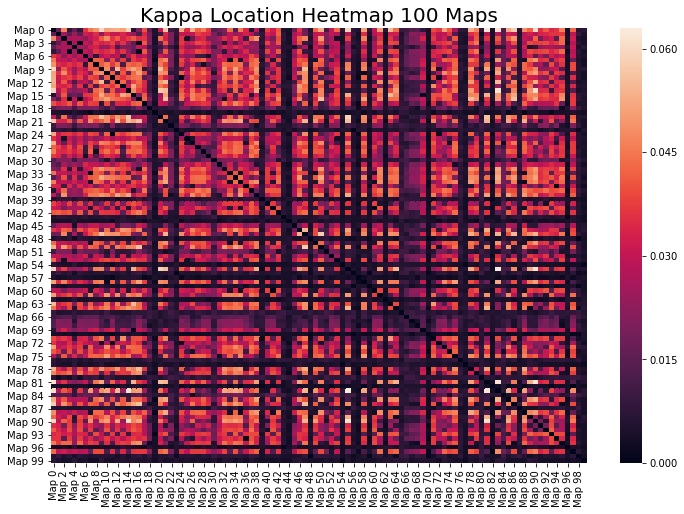

In [9]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(loc_dist)
_ = plt.title("Kappa Location Heatmap 100 Maps", fontsize =20)

# Process_KappaHisto

In [10]:
df_histo = df_100

for i in range(100):
    for j in range(100):
        if i < j:
            map_one = 'Map' + ' ' + str(i)
            map_two = 'Map' + ' ' + str(j)
            comparison = 'C:/LUMOS/MCK/Output/Kappa/' + 'Kappa' + str(i) + '_' + str(j) + '.sts'
            with open(comparison, 'r') as file:
                for l, line in enumerate(file):
                    if l == 3:
                        loc = line.find(' khisto="')
                        loc_start = loc + len(' khisto="')
                        loc_end =  line.find('"', loc_start)
                        df_histo.loc[map_one, map_two] = float(line[loc_start:loc_end])
                        df_histo.loc[map_two, map_one] = float(line[loc_start:loc_end])

In [11]:
df_histo = df_histo.astype(float).round(decimals=3)
histo_dist = 1 - df_histo
histo_dist[histo_dist < 0] = 0
histo_dist.head(10)

,Map 0,Map 1,Map 2,Map 3,Map 4,Map 5,Map 6,Map 7,Map 8,Map 9,...,Map 90,Map 91,Map 92,Map 93,Map 94,Map 95,Map 96,Map 97,Map 98,Map 99
Map 0,0.000,0.046,0.037,0.046,0.032,0.046,0.054,0.044,0.045,0.004,...,0.005,0.047,0.047,0.036,0.047,0.033,0.076,0.045,0.069,0.076
Map 1,0.046,0.000,0.012,0.002,0.037,0.002,0.011,0.015,0.015,0.043,...,0.048,0.002,0.006,0.013,0.005,0.016,0.030,0.015,0.024,0.034
Map 2,0.037,0.012,0.000,0.010,0.043,0.010,0.021,0.013,0.013,0.033,...,0.036,0.013,0.015,0.018,0.014,0.016,0.040,0.016,0.033,0.043
Map 3,0.046,0.002,0.010,0.000,0.037,0.000,0.011,0.014,0.014,0.043,...,0.046,0.004,0.005,0.011,0.005,0.014,0.030,0.016,0.024,0.034
Map 4,0.032,0.037,0.043,0.037,0.000,0.037,0.045,0.045,0.045,0.032,...,0.037,0.038,0.038,0.026,0.038,0.028,0.045,0.045,0.038,0.045
Map 5,0.046,0.002,0.010,0.000,0.037,0.000,0.011,0.014,0.014,0.043,...,0.046,0.004,0.005,0.011,0.005,0.014,0.030,0.016,0.024,0.034
Map 6,0.054,0.011,0.021,0.011,0.045,0.011,0.000,0.010,0.010,0.051,...,0.057,0.010,0.007,0.018,0.007,0.025,0.023,0.010,0.025,0.023
Map 7,0.044,0.015,0.013,0.014,0.045,0.014,0.010,0.000,0.001,0.041,...,0.047,0.015,0.013,0.018,0.013,0.025,0.032,0.004,0.035,0.032
Map 8,0.045,0.015,0.013,0.014,0.045,0.014,0.010,0.001,0.000,0.042,...,0.048,0.015,0.013,0.019,0.012,0.025,0.032,0.003,0.035,0.032
Map 9,0.004,0.043,0.033,0.043,0.032,0.043,0.051,0.041,0.042,0.000,...,0.009,0.044,0.044,0.033,0.044,0.033,0.073,0.042,0.066,0.073


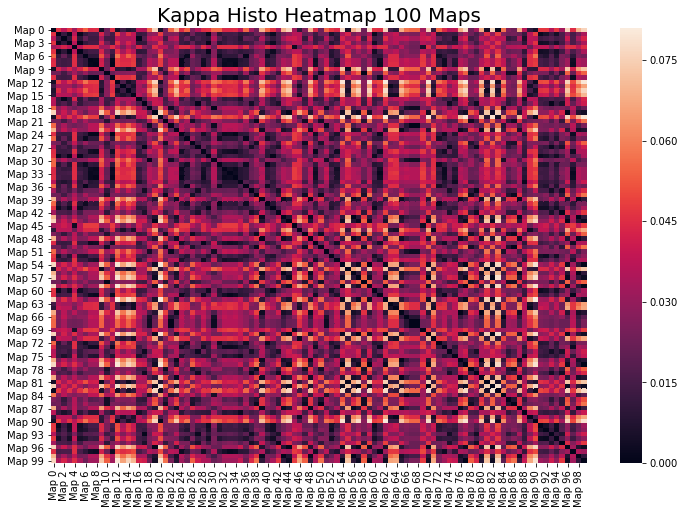

In [12]:
_ = plt.figure(figsize=(12,8)) 
_ = sns.heatmap(histo_dist)
_ = plt.title("Kappa Histo Heatmap 100 Maps", fontsize =20)

# Process_FractalDimension

In [13]:
fractal_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/fractaldimension/' + 'fractaldimension' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                fractal_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                fractal_list.append(line[loc_start2:loc_end2])

In [14]:
map_list = []
for i in range(100):
    name = 'Map' +" " +  str(i)
    map_list.append(name)

In [15]:
#Use for testing
map_list2 = []
for i in range(6):
    name = 'Map' + " " +  str(i)
    map_list2.append(name)

In [16]:
map_list3 = []
for i in range(40):
    name = 'Map' + " " +  str(i)
    map_list2.append(name)

In [17]:
df_fractal = pd.DataFrame(fractal_list, index = map_list, columns=['FractalDimension'])
df_fractal = df_fractal.astype(float).round(decimals=5)
df_fractal.head(10)

,FractalDimension
Map 0,1.46605
Map 1,1.62730
Map 2,1.62857
Map 3,1.46645
Map 4,1.63096
Map 5,1.46643
Map 6,1.46532
Map 7,1.62941
Map 8,1.62904
Map 9,1.46107


From Fragstats manual:
Range of metric: 1 > FRAC < 2<br>
A fractal dimension greater than 1 for a 2-dimensional patch indicates a departure 
from Euclidean geometry (i.e., an increase in shape complexity). <br>
FRAC approaches 1 for shapes with very simple perimeters such as squares, and
approaches 2 for shapes with highly convoluted, plane-filling perimeters.<br>

# Process_Simpsons

In [18]:
#cleaner string management
simpson_list = []
for i in range(0, 100, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/simpsons/' + 'simpsons' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                simpson_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                simpson_list.append(line[loc_start2:loc_end2])

In [19]:
df_simpsons = pd.DataFrame(simpson_list, index = map_list, columns=["Simpson's Diversity Index"])
df_simpsons = df_simpsons.astype(float).round(decimals=5)
df_simpsons.head(10)

,Simpson's Diversity Index
Map 0,0.86811
Map 1,0.86293
Map 2,0.86402
Map 3,0.86362
Map 4,0.86650
Map 5,0.86362
Map 6,0.86132
Map 7,0.86135
Map 8,0.86142
Map 9,0.86695


# Process_Clumpiness

In [20]:
#Use for testing
map_list3 = []
for i in range(40):
    name = 'Map' + " " +  str(i)
    map_list3.append(name)

In [21]:
#cleaner string management
clumpi_list = []
for i in range(0, 39, 2):
    map_one = 'map' + str(i)
    map_two = 'map' + str(i + 1)
    comparison = 'C:/LUMOS/MCK/Output/clumpiness/' + 'clumpiness' + str(i) + '_' + str(i+1) + '.sts'
    with open(comparison, 'r') as file:
        for l, line in enumerate(file):
            if l == 3:
                #Find first value
                loc = line.find('overall_first="')
                loc_start = loc + len('overall_first="')
                loc_end =  line.find('"', loc_start)
                clumpi_list.append(line[loc_start:loc_end])
                #Find second value
                loc2= line.find('overall_second="')
                loc_start2= loc2 + len('overall_second="')
                loc_end2= line.find('"', loc_start2)
                clumpi_list.append(line[loc_start2:loc_end2])  

In [22]:
df_clumpiness = pd.DataFrame(clumpi_list, index = map_list3, columns=["Clumpiness Index"])
df_clumpiness = df_clumpiness
df_clumpiness.head(10)

,Clumpiness Index
Map 0,0.24699664133275431
Map 1,0.24699664133275431
Map 2,0.24699664133275431
Map 3,0.24699664133275431
Map 4,0.24699664133275431
Map 5,0.24699664133275431
Map 6,0.24699664133275431
Map 7,0.24699664133275431
Map 8,0.24699664133275431
Map 9,0.24699664133275431


# Dendrogram_Clustering

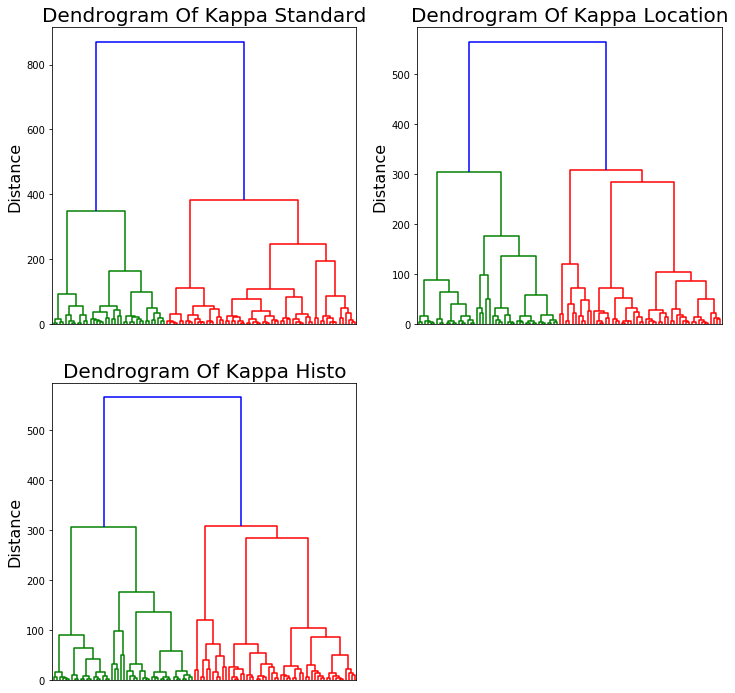

In [23]:
fig = plt.figure(figsize=(12, 12))
#Kappa Standard
#Turn distance matrix into condensed form
kappa_condensed = sch.linkage(squareform(kappa_dist))

plt.subplot(2, 2, 1)
sch.dendrogram(sch.linkage(kappa_condensed, method='ward'), labels=map_list)
ax_kappa = plt.gca()
ax_kappa.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Standard', fontsize=20)
plt.ylabel('Distance', fontsize=16)

#plt.savefig('kappa.png', format='png', bbox_inches='tight')

#kappa location dendrogram
#Turn distance matrix into condensed form
loc_condensed = sch.linkage(squareform(loc_dist))

plt.subplot(2, 2, 2)
sch.dendrogram(sch.linkage(loc_condensed, method='ward'), labels=map_list)
ax_loc = plt.gca()
ax_loc.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Location', fontsize=20)
plt.ylabel('Distance', fontsize=16)


#kappa histo dendrogram
#Turn distance matrix into condensed form
histo_condensed = sch.linkage(squareform(loc_dist))

plt.subplot(2, 2, 3)
sch.dendrogram(sch.linkage(histo_condensed, method='ward'), labels=map_list)
ax_histo = plt.gca()
ax_histo.axes.xaxis.set_ticklabels([])
plt.title('Dendrogram Of Kappa Histo', fontsize=20)
plt.ylabel('Distance', fontsize=16)

plt.show()

# Clustering_Metrics

In [24]:
kappaclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(kappa_dist)
locationclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(loc_dist)
histoclustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete').fit(histo_dist)

In [25]:
kappa_labels = kappaclustering.labels_
loc_labels = locationclustering.labels_
histo_labels = histoclustering.labels_
sil_kappa = metrics.silhouette_score(kappa_dist, kappa_labels, metric='euclidean')
sil_loc = metrics.silhouette_score(loc_dist, loc_labels, metric='euclidean')
sil_histo = metrics.silhouette_score(histo_dist, histo_labels, metric='euclidean')
#print(sil_kappa, sil_loc, sil_histo).format{}
print("Silhouette score for Kappa Standard: {:.3f}\nSilhouette score for Kappa Location: {:.3f}\nSilhouette score for Kappa Histo: {:.3f}".format(sil_kappa, sil_loc, sil_histo))

Silhouette score for Kappa Standard: 0.249
Silhouette score for Kappa Location: 0.130
Silhouette score for Kappa Histo: 0.579


In [26]:
df_cluster = pd.DataFrame(index = map_list, columns=['ClusterKappa', 'ClusterLocation', 'ClusterHisto'])
df_cluster['ClusterKappa'] = kappa_labels
df_cluster['ClusterLocation'] = loc_labels
df_cluster['ClusterHisto'] = histo_labels

df_cluster.head(5)

,ClusterKappa,ClusterLocation,ClusterHisto
Map 0,1,2,1
Map 1,0,2,0
Map 2,0,0,0
Map 3,0,2,0
Map 4,1,0,3


In [27]:
len(df_cluster[df_cluster['ClusterKappa'] == 0])

62

# Graphing_Clusters

In [28]:
xlabels = []
for i in range(0, 100, 10):
    name = 'Map' +" " +  str(i)
    xlabels.append(name)
xlabels.append('Map 99')

ylabels = [0, 1, 2, 3]

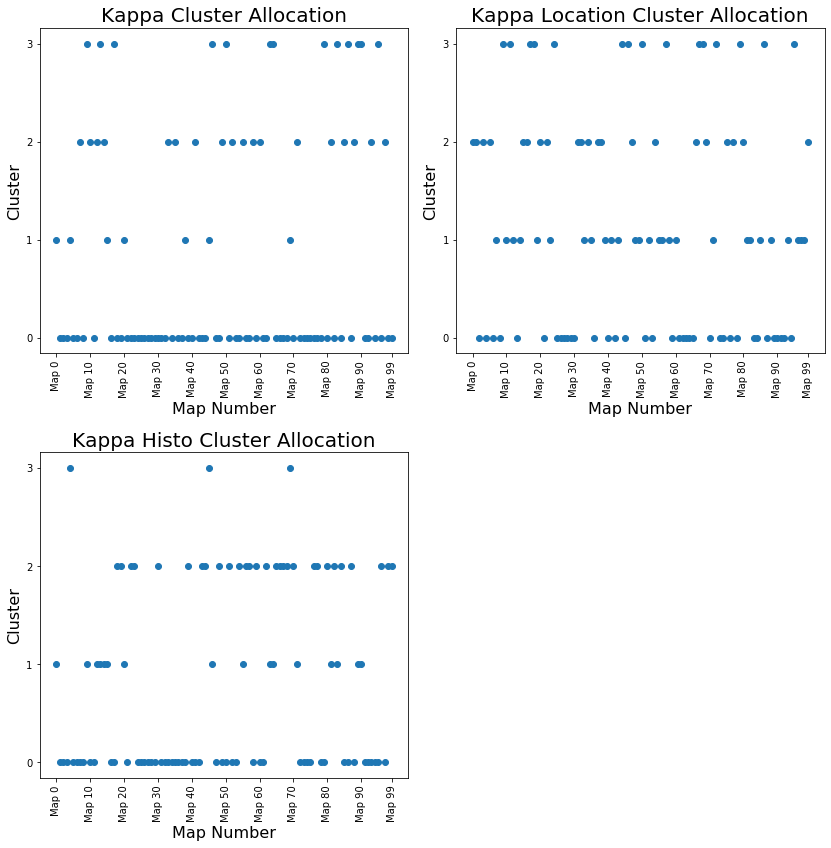

In [29]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(map_list, kappa_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(2, 2, 2)
plt.scatter(map_list, loc_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Location Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

plt.subplot(2, 2, 3)
plt.scatter(map_list, histo_labels)
plt.yticks(ylabels, ylabels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99], xlabels, rotation='vertical')
plt.title('Kappa Histo Cluster Allocation', fontsize=20)
plt.xlabel('Map Number', fontsize=16)
plt.ylabel('Cluster', fontsize=16)

fig.tight_layout(pad=1.5)

plt.show()

# Find_Medoids

In [30]:
# kappa_reduc0 = df_cluster[df_cluster['ClusterKappa'] == 0].drop(axis='columns', labels=['ClusterLocation', 'ClusterHisto'])
# kappa_list0 = kappa_reduc0.index
# kappa_cl0 = df_kappa
# kappa_cl0 = kappa_cl0[kappa_cl0.index.isin(kappa_list0)]
# kappa_cl0 = kappa_cl0[kappa_list0]
# kappa_cl0['Sum'] = kappa_cl0.sum(axis='index')
# kappa_cl0.sort_values(by='Sum', ascending=False)

In [31]:
def find_medoid(metric='ClusterKappa', cluster=0):
    global df_cluster
    metric_list= ['ClusterKappa', 'ClusterLocation', 'ClusterHisto']
    metric_list.remove(metric)
    df_clean = df_cluster[df_cluster[metric] == cluster].drop(axis='columns', labels=metric_list)
    reduc_list = df_clean.index
    df_reduc = df_kappa
    df_reduc = df_reduc[df_reduc.index.isin(reduc_list)]
    df_reduc = df_reduc[reduc_list]
    df_reduc['Sum'] = df_reduc.sum(axis='index')
    return df_reduc

In [32]:
kappa_cluster0 = find_medoid()
kappa_cluster1= find_medoid(cluster=1)
kappa_cluster2= find_medoid(cluster=2)
kappa_cluster3= find_medoid(cluster=3)

# Small test to see if all clusters combined give correct number
sum_clusters = len(kappa_cluster0 + kappa_cluster1+ kappa_cluster2 + kappa_cluster3)
print('The number of maps in all clusters is {},which should be 100 according to the number of maps in the dataset'.format(sum_clusters))

med_kappa0 = kappa_cluster0['Sum'].idxmax(axis=0, skipna=True)
med_kappa1 = kappa_cluster1['Sum'].idxmax(axis=0, skipna=True)
med_kappa2 = kappa_cluster2['Sum'].idxmax(axis=0, skipna=True)
med_kappa3 = kappa_cluster3['Sum'].idxmax(axis=0, skipna=True)
print('The Medoid map of Kappa cluster 0 is {}\nThe Medoid map of Kappa cluster 1 is {}\nThe Medoid map of Kappa cluster 2 is {}\n' \
        'The Medoid map of Kappa cluster 3 is {}\n'.format(med_kappa0, med_kappa1, med_kappa2, med_kappa3))

The number of maps in all clusters is 100,which should be 100 according to the number of maps in the dataset
The Medoid map of Kappa cluster 0 is Map 56
The Medoid map of Kappa cluster 1 is Map 15
The Medoid map of Kappa cluster 2 is Map 60
The Medoid map of Kappa cluster 3 is Map 95



In [33]:
loc_cluster0 = find_medoid(metric='ClusterLocation', cluster=0)
loc_cluster1 = find_medoid(metric='ClusterLocation',cluster=1)
loc_cluster2 = find_medoid(metric='ClusterLocation',cluster=2)
loc_cluster3 = find_medoid(metric='ClusterLocation',cluster=3)

#Small test to see if all clusters combined give correct number
sum_clusters2 = len(loc_cluster0 + loc_cluster1+ loc_cluster2 + loc_cluster3)
print('The number of maps in all clusters is {},which should be 100 according to the number of maps in the dataset'.format(sum_clusters2))

med_loc0 = loc_cluster0['Sum'].idxmax(axis=0, skipna=True)
med_loc1 = loc_cluster1['Sum'].idxmax(axis=0, skipna=True)
med_loc2 = loc_cluster2['Sum'].idxmax(axis=0, skipna=True)
med_loc3 = loc_cluster3['Sum'].idxmax(axis=0, skipna=True)
print('The Medoid map of Kappa Location cluster 0 is {}\nThe Medoid map of Kappa Location cluster 1 is {}\nThe Medoid map of Kappa Location cluster 2' \
      ' is {}\nThe Medoid map of Kappa Location cluster 3 is {}\n'.format(med_loc0, med_loc1, med_loc2, med_loc3))

The number of maps in all clusters is 100,which should be 100 according to the number of maps in the dataset
The Medoid map of Kappa Location cluster 0 is Map 87
The Medoid map of Kappa Location cluster 1 is Map 60
The Medoid map of Kappa Location cluster 2 is Map 3
The Medoid map of Kappa Location cluster 3 is Map 95



In [34]:
histo_cluster0 = find_medoid(metric='ClusterHisto', cluster=0)
histo_cluster1 = find_medoid(metric='ClusterHisto',cluster=1)
histo_cluster2 = find_medoid(metric='ClusterHisto',cluster=2)
histo_cluster3 = find_medoid(metric='ClusterHisto',cluster=3)

#Small test to see if all clusters combined give correct number
sum_clusters3 = len(histo_cluster0 + histo_cluster1+ histo_cluster2 + histo_cluster3)
print('The number of maps in all clusters is {},which should be 100 according to the number of maps in the dataset'.format(sum_clusters3))

med_histo0 = histo_cluster0['Sum'].idxmax(axis=0, skipna=True)
med_histo1 = histo_cluster1['Sum'].idxmax(axis=0, skipna=True)
med_histo2 = histo_cluster2['Sum'].idxmax(axis=0, skipna=True)
med_histo3 = histo_cluster3['Sum'].idxmax(axis=0, skipna=True)
print('The Medoid map of Kappa Location cluster 0 is {}\nThe Medoid map of Kappa Location cluster 1 is {}\nThe Medoid map of Kappa Location cluster 2' \
      ' is {}\nThe Medoid map of Kappa Location cluster 3 is {}\n'.format(med_histo0, med_histo1, med_histo2, med_histo3))

The number of maps in all clusters is 100,which should be 100 according to the number of maps in the dataset
The Medoid map of Kappa Location cluster 0 is Map 41
The Medoid map of Kappa Location cluster 1 is Map 71
The Medoid map of Kappa Location cluster 2 is Map 48
The Medoid map of Kappa Location cluster 3 is Map 45



<font size='5'>Create Summarizing DF</font>

In [38]:
cluster_rows = ['Cluster0','Cluster1', 'Cluster2', 'Cluster3']
kappa_meds =[med_kappa0, med_kappa1, med_kappa2, med_kappa3]
loc_meds = [med_loc0, med_loc1, med_loc2, med_loc3]
histo_meds = [med_histo0, med_histo1, med_histo2, med_histo3]

cluster_sum = pd.DataFrame({'Kappa' : kappa_meds, 'KappaHisto' : histo_meds, 'KappaLoc' : loc_meds}, index=cluster_rows)
cluster_sum

,Kappa,KappaHisto,KappaLoc
Cluster0,Map 56,Map 41,Map 87
Cluster1,Map 15,Map 71,Map 60
Cluster2,Map 60,Map 48,Map 3
Cluster3,Map 95,Map 45,Map 95


# ToDo
Calculate some cluster metrics - intra/inter cluster (see Margriet)